In [1]:
import numpy as np
import anjl
import plotly.io
import zarr
from scipy.spatial.distance import squareform
import pandas as pd

plotly.io.renderers.default = "plotly_mimetype+notebook_connected"

## Example 1

In [2]:
D1 = np.array(
    [  # A B C D
        [0, 4, 5, 10],
        [4, 0, 7, 12],
        [5, 7, 0, 9],
        [10, 12, 9, 0],
    ],
    dtype=np.float32,
)
Z1 = anjl.canonical_nj(D1)
Z1

array([[0. , 1. , 1. , 3. , 2. ],
       [2. , 4. , 2. , 2. , 3. ],
       [3. , 5. , 3.5, 3.5, 4. ]], dtype=float32)

In [3]:
print(anjl.to_string(Z1))

Node(id=6, dist=0, count=4)
    Leaf(id=3, dist=3.5)
    Node(id=5, dist=3.5, count=3)
        Leaf(id=2, dist=2.0)
        Node(id=4, dist=2.0, count=2)
            Leaf(id=0, dist=1.0)
            Leaf(id=1, dist=3.0)


In [4]:
Z1r = anjl.rapid_nj(D1)
Z1r

array([[0. , 1. , 1. , 3. , 2. ],
       [2. , 4. , 2. , 2. , 3. ],
       [3. , 5. , 3.5, 3.5, 4. ]], dtype=float32)

In [5]:
print(anjl.to_string(Z1r))

Node(id=6, dist=0, count=4)
    Leaf(id=3, dist=3.5)
    Node(id=5, dist=3.5, count=3)
        Leaf(id=2, dist=2.0)
        Node(id=4, dist=2.0, count=2)
            Leaf(id=0, dist=1.0)
            Leaf(id=1, dist=3.0)


In [6]:
df_internal_nodes, df_leaf_nodes, df_edges = anjl.layout_equal_angle(Z=Z1)

In [7]:
df_leaf_nodes

,x,y,id
0,-6.596194,-0.353554,1
1,-5.181980,-3.181981,0
2,-1.060660,-3.889087,2
3,2.474874,2.474874,3


In [8]:
df_internal_nodes

,x,y,id
0,0.000000,0.000000,6
1,-2.474874,-2.474874,5
2,-4.474874,-2.474874,4


In [9]:
df_edges

,x,y,id
0,0.000000,0.000000,3
1,2.474874,2.474874,3
2,NaN,NaN,3
3,0.000000,0.000000,5
4,-2.474874,-2.474874,5
5,NaN,NaN,5
6,-2.474874,-2.474874,2
7,-1.060660,-3.889087,2
8,NaN,NaN,2
9,-2.474874,-2.474874,4


In [10]:
anjl.plot_equal_angle(Z1, marker_size=5, internal_marker_size=5, width=400, height=400)

In [11]:
anjl.plot_equal_angle(Z1r, marker_size=5, internal_marker_size=5, width=400, height=400)

In [12]:
ld1 = pd.DataFrame.from_records(
    [
        ["A", "apple", "carrot", "pigeon", "Ferrari"],
        ["B", "apple", "pea", "ladybird", "Lamborghini"],
        ["C", "banana", "cabbage", "pigeon", "Landrover"],
        ["D", "mango", "cabbage", "spider", "Lamborghini"],
    ],
    columns=["name", "fruit", "vegetable", "animal", "car"],
)
ld1

,name,fruit,vegetable,animal,car
0,A,apple,carrot,pigeon,Ferrari
1,B,apple,pea,ladybird,Lamborghini
2,C,banana,cabbage,pigeon,Landrover
3,D,mango,cabbage,spider,Lamborghini


In [13]:
anjl.map_internal_to_leaves(Z1)

[[0, 1], [2, 0, 1], [3, 2, 0, 1]]

In [14]:
anjl.paint_internal(Z1, ld1["fruit"].values)

array(['apple', '', ''], dtype=object)

In [15]:
anjl.plot_equal_angle(
    Z=Z1,
    leaf_data=ld1,
    hover_name="name",
    hover_data=["fruit", "vegetable", "animal", "car"],
    color="fruit",
    marker_size=20,
    internal_marker_size=5,
    line_width=4,
)

In [16]:
anjl.plot_equal_angle(
    Z=Z1r,
    leaf_data=ld1,
    hover_name="name",
    hover_data=["fruit", "vegetable", "animal", "car"],
    color="fruit",
    marker_size=20,
    symbol="car",
    internal_marker_size=5,
    line_width=4,
)

## Example 2

In [17]:
D2 = np.array(
    [  # a b c d e
        [0, 5, 9, 9, 8],
        [5, 0, 10, 10, 9],
        [9, 10, 0, 8, 7],
        [9, 10, 8, 0, 3],
        [8, 9, 7, 3, 0],
    ],
    dtype=np.float32,
)
Z2 = anjl.canonical_nj(D2)
Z2

array([[0. , 1. , 2. , 3. , 2. ],
       [2. , 5. , 4. , 3. , 3. ],
       [3. , 6. , 2. , 2. , 4. ],
       [4. , 7. , 0.5, 0.5, 5. ]], dtype=float32)

In [18]:
print(anjl.to_string(Z2))

Node(id=8, dist=0, count=5)
    Leaf(id=4, dist=0.5)
    Node(id=7, dist=0.5, count=4)
        Leaf(id=3, dist=2.0)
        Node(id=6, dist=2.0, count=3)
            Leaf(id=2, dist=4.0)
            Node(id=5, dist=3.0, count=2)
                Leaf(id=0, dist=2.0)
                Leaf(id=1, dist=3.0)


In [19]:
Z2r = anjl.rapid_nj(D2)
Z2r

array([[0., 1., 2., 3., 2.],
       [2., 5., 4., 3., 3.],
       [4., 6., 1., 2., 4.],
       [3., 7., 1., 1., 5.]], dtype=float32)

In [20]:
print(anjl.to_string(Z2r))

Node(id=8, dist=0, count=5)
    Leaf(id=3, dist=1.0)
    Node(id=7, dist=1.0, count=4)
        Leaf(id=4, dist=1.0)
        Node(id=6, dist=2.0, count=3)
            Leaf(id=2, dist=4.0)
            Node(id=5, dist=3.0, count=2)
                Leaf(id=0, dist=2.0)
                Leaf(id=1, dist=3.0)


In [21]:
anjl.map_internal_to_leaves(Z2)

[[0, 1], [2, 0, 1], [3, 2, 0, 1], [4, 3, 2, 0, 1]]

In [22]:
anjl.map_internal_to_leaves(Z2r)

[[0, 1], [2, 0, 1], [4, 2, 0, 1], [3, 4, 2, 0, 1]]

In [23]:
anjl.plot_equal_angle(Z=Z2, line_width=2, marker_size=20, internal_marker_size=5)

In [24]:
anjl.plot_equal_angle(Z=Z2r, line_width=2, marker_size=20, internal_marker_size=5)

## Example 3 (small)

In [25]:
ld3 = pd.read_csv("../data/small/samples.csv")
ld3.head()

,sample_id,partner_sample_id,contributor,country,location,year,month,latitude,longitude,sex_call,...,admin1_name,admin1_iso,admin2_name,taxon,cohort_admin1_year,cohort_admin1_month,cohort_admin1_quarter,cohort_admin2_year,cohort_admin2_month,cohort_admin2_quarter
0,AB0085-Cx,BF2-4,Austin Burt,Burkina Faso,Pala,2012,7,11.151,-4.235,F,...,Hauts-Bassins,BF-09,Houet,gambiae,BF-09_gamb_2012,BF-09_gamb_2012_07,BF-09_gamb_2012_Q3,BF-09_Houet_gamb_2012,BF-09_Houet_gamb_2012_07,BF-09_Houet_gamb_2012_Q3
1,AB0086-Cx,BF2-6,Austin Burt,Burkina Faso,Pala,2012,7,11.151,-4.235,F,...,Hauts-Bassins,BF-09,Houet,gambiae,BF-09_gamb_2012,BF-09_gamb_2012_07,BF-09_gamb_2012_Q3,BF-09_Houet_gamb_2012,BF-09_Houet_gamb_2012_07,BF-09_Houet_gamb_2012_Q3
2,AB0087-C,BF3-3,Austin Burt,Burkina Faso,Bana Village,2012,7,11.233,-4.472,F,...,Hauts-Bassins,BF-09,Houet,coluzzii,BF-09_colu_2012,BF-09_colu_2012_07,BF-09_colu_2012_Q3,BF-09_Houet_colu_2012,BF-09_Houet_colu_2012_07,BF-09_Houet_colu_2012_Q3
3,AB0088-C,BF3-5,Austin Burt,Burkina Faso,Bana Village,2012,7,11.233,-4.472,F,...,Hauts-Bassins,BF-09,Houet,coluzzii,BF-09_colu_2012,BF-09_colu_2012_07,BF-09_colu_2012_Q3,BF-09_Houet_colu_2012,BF-09_Houet_colu_2012_07,BF-09_Houet_colu_2012_Q3
4,AB0089-Cx,BF3-8,Austin Burt,Burkina Faso,Bana Village,2012,7,11.233,-4.472,F,...,Hauts-Bassins,BF-09,Houet,coluzzii,BF-09_colu_2012,BF-09_colu_2012_07,BF-09_colu_2012_Q3,BF-09_Houet_colu_2012,BF-09_Houet_colu_2012_07,BF-09_Houet_colu_2012_Q3


In [26]:
small = zarr.load("../data/small/dist.zarr.zip")
D3 = squareform(small)
D3.shape

(181, 181)

In [27]:
Z3 = anjl.canonical_nj(D3)

In [28]:
Z3r = anjl.rapid_nj(D3)

In [29]:
anjl.plot_equal_angle(
    Z3,
    line_width=1,
    marker_size=8,
    count_sort=True,
    color="taxon",
    hover_name="sample_id",
    leaf_data=ld3,
)

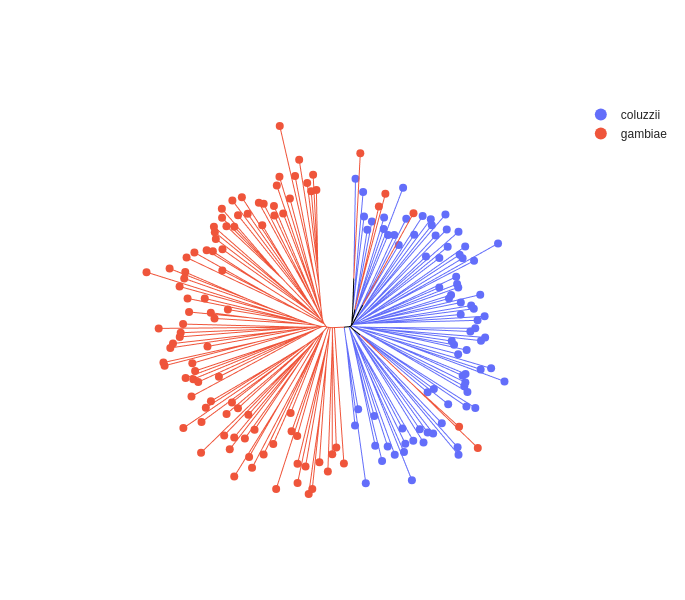

In [30]:
anjl.plot_equal_angle(
    Z3r,
    line_width=1,
    marker_size=8,
    count_sort=True,
    color="taxon",
    hover_name="sample_id",
    leaf_data=ld3,
)

## Example 4 (medium)

In [31]:
ld4 = pd.read_csv("../data/medium/samples.csv")
ld4.head()

,sample_id,partner_sample_id,contributor,country,location,year,month,latitude,longitude,sex_call,...,admin1_name,admin1_iso,admin2_name,taxon,cohort_admin1_year,cohort_admin1_month,cohort_admin1_quarter,cohort_admin2_year,cohort_admin2_month,cohort_admin2_quarter
0,AR0047-C,LUA047,Joao Pinto,Angola,Luanda,2009,4,-8.884,13.302,F,...,Luanda,AO-LUA,Luanda,coluzzii,AO-LUA_colu_2009,AO-LUA_colu_2009_04,AO-LUA_colu_2009_Q2,AO-LUA_Luanda_colu_2009,AO-LUA_Luanda_colu_2009_04,AO-LUA_Luanda_colu_2009_Q2
1,AR0049-C,LUA049,Joao Pinto,Angola,Luanda,2009,4,-8.884,13.302,F,...,Luanda,AO-LUA,Luanda,coluzzii,AO-LUA_colu_2009,AO-LUA_colu_2009_04,AO-LUA_colu_2009_Q2,AO-LUA_Luanda_colu_2009,AO-LUA_Luanda_colu_2009_04,AO-LUA_Luanda_colu_2009_Q2
2,AR0051-C,LUA051,Joao Pinto,Angola,Luanda,2009,4,-8.884,13.302,F,...,Luanda,AO-LUA,Luanda,coluzzii,AO-LUA_colu_2009,AO-LUA_colu_2009_04,AO-LUA_colu_2009_Q2,AO-LUA_Luanda_colu_2009,AO-LUA_Luanda_colu_2009_04,AO-LUA_Luanda_colu_2009_Q2
3,AR0061-C,LUA061,Joao Pinto,Angola,Luanda,2009,4,-8.884,13.302,F,...,Luanda,AO-LUA,Luanda,coluzzii,AO-LUA_colu_2009,AO-LUA_colu_2009_04,AO-LUA_colu_2009_Q2,AO-LUA_Luanda_colu_2009,AO-LUA_Luanda_colu_2009_04,AO-LUA_Luanda_colu_2009_Q2
4,AR0078-C,LUA078,Joao Pinto,Angola,Luanda,2009,4,-8.884,13.302,F,...,Luanda,AO-LUA,Luanda,coluzzii,AO-LUA_colu_2009,AO-LUA_colu_2009_04,AO-LUA_colu_2009_Q2,AO-LUA_Luanda_colu_2009,AO-LUA_Luanda_colu_2009_04,AO-LUA_Luanda_colu_2009_Q2


In [32]:
medium = zarr.load("../data/medium/dist.zarr.zip")
D4 = squareform(medium)
D4.shape

(472, 472)

In [33]:
Z4 = anjl.canonical_nj(D4)
Z4

array([[3.89000000e+02, 4.25000000e+02, 0.00000000e+00, 0.00000000e+00,
        2.00000000e+00],
       [9.00000000e+00, 7.10000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.00000000e+00],
       [4.52000000e+02, 4.69000000e+02, 6.97222233e+00, 5.02777767e+00,
        2.00000000e+00],
       ...,
       [9.38000000e+02, 9.39000000e+02, 2.23355591e-01, 1.39061511e-01,
        4.25000000e+02],
       [9.36000000e+02, 9.40000000e+02, 4.10231918e-01, 1.08985394e-01,
        4.40000000e+02],
       [9.37000000e+02, 9.41000000e+02, 1.57432839e-01, 1.57432839e-01,
        4.72000000e+02]], dtype=float32)

In [34]:
Z4r = anjl.rapid_nj(D4)
Z4r

array([[3.89000000e+02, 4.25000000e+02, 0.00000000e+00, 0.00000000e+00,
        2.00000000e+00],
       [9.00000000e+00, 7.10000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.00000000e+00],
       [4.52000000e+02, 4.69000000e+02, 6.97222233e+00, 5.02777767e+00,
        2.00000000e+00],
       ...,
       [9.38000000e+02, 9.39000000e+02, 2.23355591e-01, 1.39061511e-01,
        4.25000000e+02],
       [9.37000000e+02, 9.40000000e+02, 3.14865679e-01, 1.08985394e-01,
        4.57000000e+02],
       [9.36000000e+02, 9.41000000e+02, 2.05115959e-01, 2.05115959e-01,
        4.72000000e+02]], dtype=float32)

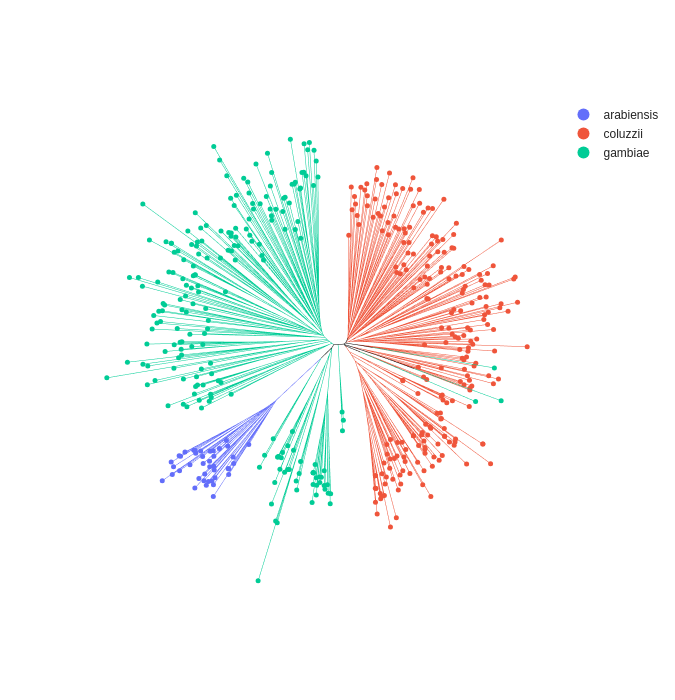

In [35]:
anjl.plot_equal_angle(
    Z4,
    line_width=0.5,
    marker_size=5,
    width=800,
    height=700,
    leaf_data=ld4,
    color="taxon",
    hover_name="sample_id",
    hover_data=["country", "location", "year", "month"],
)

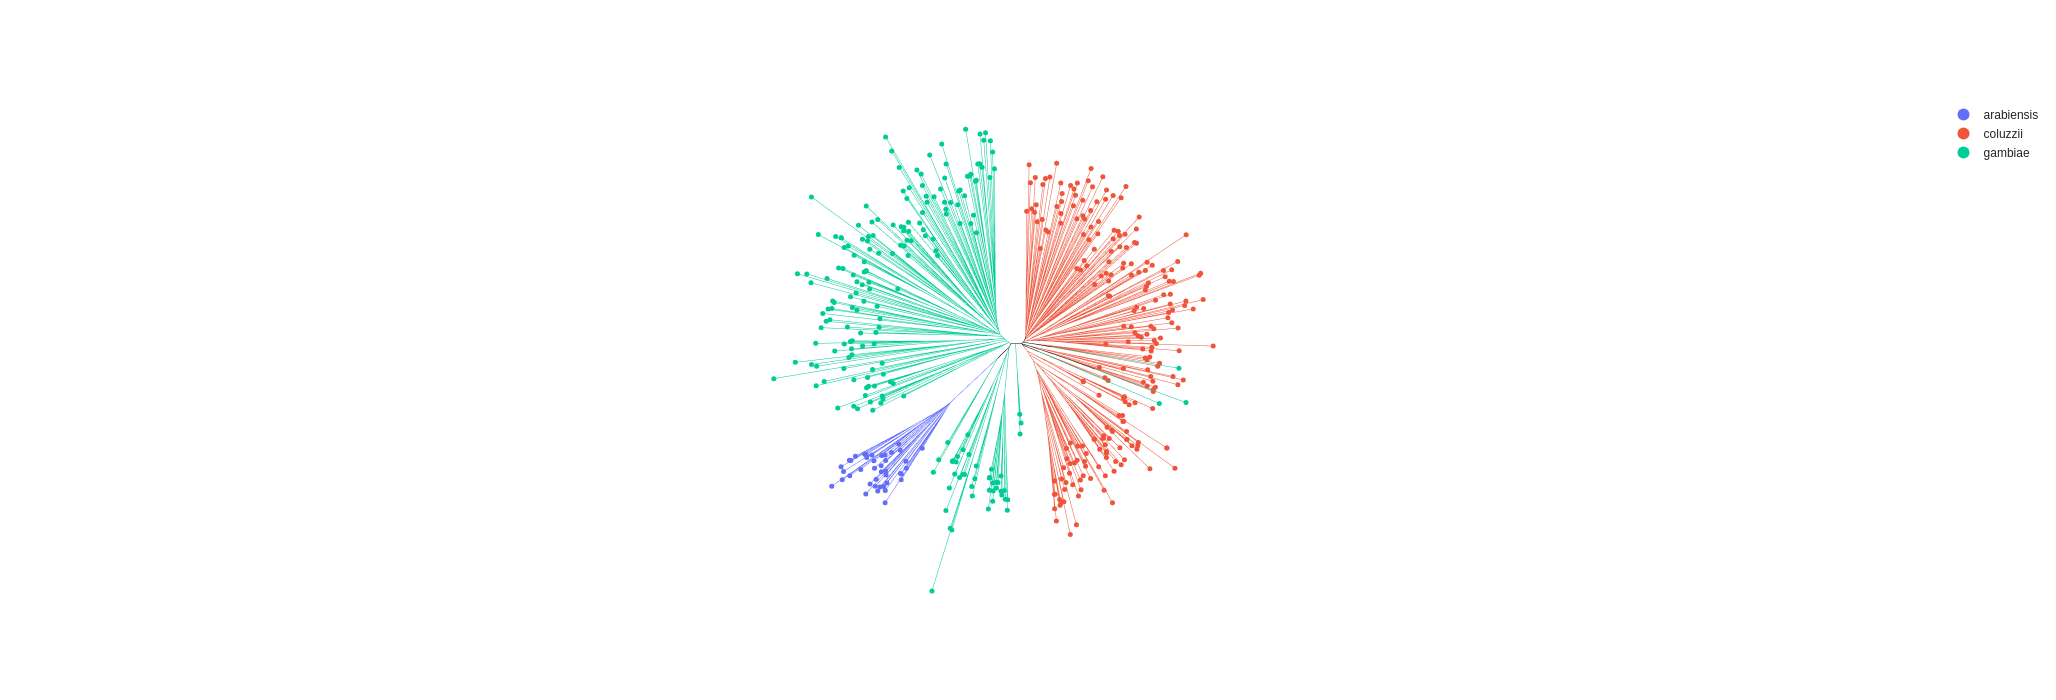

In [36]:
anjl.plot_equal_angle(
    Z4r,
    line_width=0.5,
    marker_size=5,
    width=800,
    height=700,
    leaf_data=ld4,
    color="taxon",
    hover_name="sample_id",
    hover_data=["country", "location", "year", "month"],
)